Task 3: Does the weather affect the delay?

Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

- sunny
- cloudy
- rainy
- snow. 

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [89]:
import pandas as pd 
import numpy as np

In [3]:

sample = pd.read_csv('G_PSQL_data/random_sample.txt')

In [4]:
sample.columns 

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [5]:
sample = sample[["fl_date","origin_city_name","dep_delay"]]

In [17]:
sample["dep_delay"].fillna(0)

0         23.0
1         -4.0
2         66.0
3         41.0
4         22.0
          ... 
106438    21.0
106439    -7.0
106440    -2.0
106441    42.0
106442    -5.0
Name: dep_delay, Length: 106443, dtype: float64

In [44]:
chicago = sample.loc[sample.origin_city_name == "Chicago, IL"]
chicago.info

<bound method DataFrame.info of            fl_date origin_city_name  dep_delay
7       2018-01-01      Chicago, IL       17.0
30      2018-01-01      Chicago, IL       25.0
31      2018-01-01      Chicago, IL       21.0
54      2018-01-01      Chicago, IL       33.0
135     2018-01-02      Chicago, IL       40.0
...            ...              ...        ...
106278  2019-07-30      Chicago, IL       38.0
106324  2019-07-31      Chicago, IL       -2.0
106357  2019-07-31      Chicago, IL       -7.0
106382  2019-07-31      Chicago, IL       -1.0
106442  2019-07-31      Chicago, IL       -5.0

[6404 rows x 3 columns]>

In [110]:
weather = pd.read_csv("Chicago_Weather.csv")


In [111]:
c_w = chicago.merge(weather, how='left', left_on="fl_date", right_on='datetime')

In [112]:
c_w.conditions.unique()

array(['Clear', 'Partially cloudy', 'Overcast', 'Snow, Overcast',
       'Rain, Overcast', 'Snow, Partially cloudy',
       'Rain, Partially cloudy', nan], dtype=object)

In [113]:
c_w.dropna(inplace=True)

In [114]:
c_w = c_w.replace({'Partially cloudy': 'Cloudy',
                           'Overcast': 'Cloudy',
                           'Snow, Overcast': 'Snow',
                           'Rain, Overcast': 'Rain',
                          'Snow, Partially cloudy': 'Snow',
                          'Rain, Partially cloudy': 'Rain'})




In [115]:
c_w.drop(columns=["fl_date","origin_city_name","datetime"], inplace=True)

In [116]:
c_w = c_w[c_w['dep_delay'] < 400]

In [117]:
#need to remove outliers greater than 3 std

# calculate summary statistics
data_mean, data_std = np.mean(c_w['dep_delay']), np.std(c_w['dep_delay'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in c_w['dep_delay'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers

c_w['dep_delay'].drop(c_w[(c_w['dep_delay'] > upper) | (c_w['dep_delay'] < lower)].index, inplace=True)




Identified outliers: 135


In [118]:
import seaborn as sn
from matplotlib import pyplot as plt

In [119]:
clear = c_w.loc[c_w['conditions'] == 'Clear', ['dep_delay']]


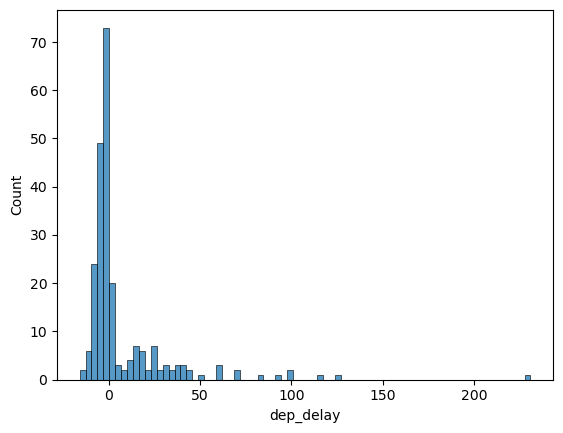

In [120]:
sn.histplot(clear["dep_delay"])
plt.show()


In [121]:
clear['dep_delay'].describe()

count    233.000000
mean       7.081545
std       26.441498
min      -16.000000
25%       -5.000000
50%       -2.000000
75%        5.000000
max      231.000000
Name: dep_delay, dtype: float64

In [122]:
cloudy = c_w.loc[c_w['conditions'] == 'Cloudy', ['dep_delay']]

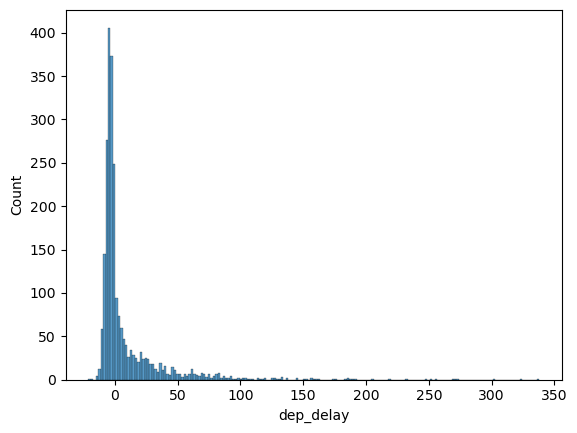

In [123]:
sn.histplot(cloudy["dep_delay"])
plt.show()


In [124]:
cloudy['dep_delay'].describe()

count    2393.000000
mean        9.089427
std        32.046964
min       -21.000000
25%        -5.000000
50%        -2.000000
75%         8.000000
max       338.000000
Name: dep_delay, dtype: float64

In [125]:
rain = c_w.loc[c_w['conditions'] == 'Rain', ['dep_delay']]

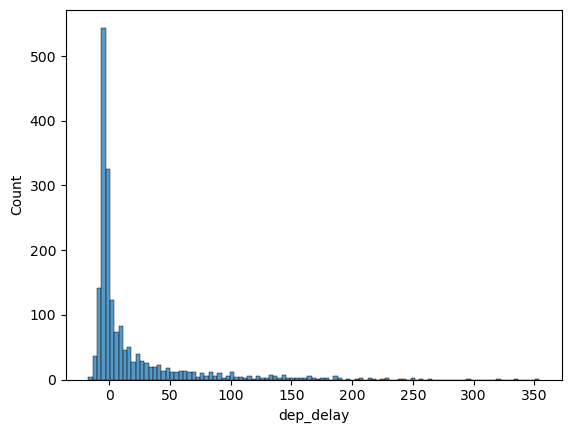

In [126]:
sn.histplot(rain["dep_delay"])
plt.show()


In [127]:
rain['dep_delay'].describe()

count    1890.000000
mean       17.638624
std        43.878726
min       -17.000000
25%        -4.000000
50%        -1.000000
75%        18.000000
max       354.000000
Name: dep_delay, dtype: float64

In [128]:
snow = c_w.loc[c_w['conditions'] == 'Snow', ['dep_delay']]

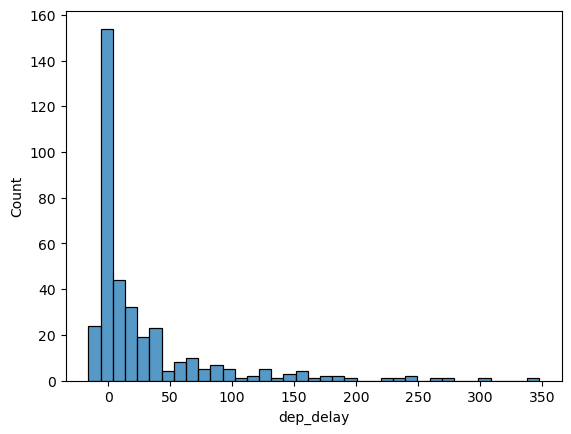

In [129]:
sn.histplot(snow["dep_delay"])
plt.show()


In [130]:
snow['dep_delay'].describe()

count    365.000000
mean      27.528767
std       54.426252
min      -16.000000
25%       -2.000000
50%        4.000000
75%       34.000000
max      348.000000
Name: dep_delay, dtype: float64

In [29]:


url = 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=82651e6b563e4afca44205949221703&q=Chicago&format=json&date=2018-01-01&enddate=2019-07-31&tp=24'

res = requests.get(url)

chicago = JSON(res.json())

chicago

<IPython.core.display.JSON object>